In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Cargar el archivo limpio
file_path = "C:/Users/Juan Pablo Pedraza/OneDrive - Universidad de los andes/Andes/Octavo Semestre/Analisis computacional/Proyecto 3/Selección, limpieza y alistamiento de datos Proyecto 3/Datos_limpios_nariño.csv"  # Archivo limpio
df_cleaned = pd.read_csv(file_path)

# Inspeccionar las primeras filas
print("Primeras filas del dataset:")
print(df_cleaned.head())

# Información general
print("\nInformación del dataset:")
print(df_cleaned.info())


Primeras filas del dataset:
  cole_area_ubicacion cole_bilingue cole_calendario      cole_caracter  \
0              URBANO             N               A  TÉCNICO/ACADÉMICO   
1              URBANO             N               A  TÉCNICO/ACADÉMICO   
2              URBANO             N               A          ACADÉMICO   
3              URBANO             N               A          ACADÉMICO   
4              URBANO             S               A  TÉCNICO/ACADÉMICO   

  cole_depto_ubicacion cole_genero cole_jornada estu_privado_libertad  \
0               NARIÑO       MIXTO       MAÑANA                     N   
1               NARIÑO    FEMENINO       MAÑANA                     N   
2               NARIÑO    FEMENINO       MAÑANA                     N   
3               NARIÑO       MIXTO       MAÑANA                     N   
4               NARIÑO       MIXTO       MAÑANA                     N   

                    fami_educacionmadre                   fami_educacionpadre  \
0      

In [14]:

# Seleccionar variables predictoras y objetivo
X = df_cleaned[['estu_privado_libertad', 'cole_jornada', 'cole_bilingue']]  
y = df_cleaned['punt_global']

# Manejar valores faltantes
X = X.fillna({
    'naturaleza': 'Sin dato',
    'jornada': 'Sin dato',
    'bilingüismo': 'No',
})

# Verificar columnas categóricas y numéricas
columnas_categoricas = X.select_dtypes(include='object').columns
columnas_numericas = X.select_dtypes(include=['number']).columns

# Codificar variables categóricas
if not columnas_categoricas.empty:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_encoded = encoder.fit_transform(X[columnas_categoricas])
else:
    X_encoded = np.empty((X.shape[0], 0))  # Si no hay categóricas

# Escalar variables numéricas
if not columnas_numericas.empty:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[columnas_numericas])
else:
    X_scaled = np.empty((X.shape[0], 0))  # Si no hay numéricas

# Combinar las variables
X_final = np.hstack([X_scaled, X_encoded])

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("Datos listos para el modelo. Dimensiones del conjunto de entrenamiento:", X_train.shape)



Datos listos para el modelo. Dimensiones del conjunto de entrenamiento: (87360, 7)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construcción del modelo de regresión
model_reg = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Capa oculta con 64 neuronas
    Dense(32, activation='relu'),  # Capa oculta con 32 neuronas
    Dense(1)  # Salida para regresión
])

# Compilación del modelo
model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
history_reg = model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluación del modelo
loss, mae = model_reg.evaluate(X_test, y_test)
print(f"Pérdida (MSE): {loss}, Error Absoluto Medio (MAE): {mae}")



c:\Users\Juan Pablo Pedraza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 20425.9102 - mae: 108.3522 - val_loss: 9329.9160 - val_mae: 69.7564
Epoch 2/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9146.2598 - mae: 69.3163 - val_loss: 9324.0762 - val_mae: 69.3810
Epoch 3/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - loss: 9080.6641 - mae: 68.9204 - val_loss: 9334.1064 - val_mae: 71.4802
Epoch 4/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 976us/step - loss: 9157.0674 - mae: 69.3541 - val_loss: 9303.8428 - val_mae: 70.4592
Epoch 5/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9171.3291 - mae: 69.5325 - val_loss: 9309.1543 - val_mae: 69.2859
Epoch 6/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 944us/step - loss: 9200.3350 - mae: 69.6994 - val_loss: 9296.6318 - val_mae: 70.0530
Epoch 7/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9125.9824 - mae: 69.1544 - val_loss: 9298.6357 - val_mae: 69.3990
Epoch 8/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9176.5156 - mae: 69.5461 - val_los

683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step


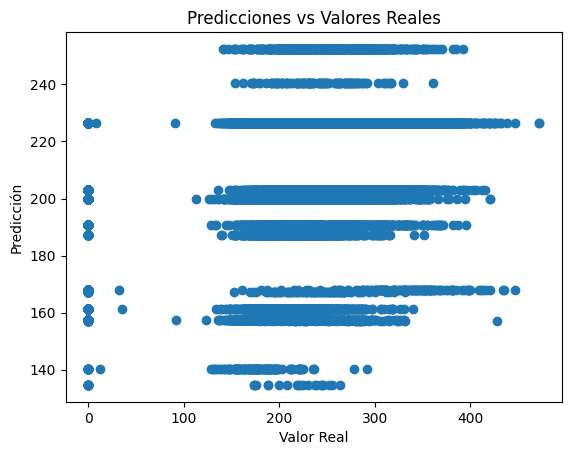

In [16]:
import matplotlib.pyplot as plt

# Predicciones
y_pred = model_reg.predict(X_test)

# Comparar predicciones con valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Predicciones vs Valores Reales")
plt.show()


Modelo #2

In [21]:

# Selección de variables predictoras y objetivo
X = df_cleaned[['cole_area_ubicacion', 'fami_tienecomputador', 'fami_educacionpadre']]
y = df_cleaned['punt_global']

# Transformar variables categóricas
columnas_categoricas = X.select_dtypes(include='object').columns
if len(columnas_categoricas) > 0:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_encoded = encoder.fit_transform(X[columnas_categoricas])
else:
    X_encoded = np.empty((X.shape[0], 0))

# Escalar variables numéricas
columnas_numericas = X.select_dtypes(include=['number']).columns
if len(columnas_numericas) > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[columnas_numericas])
else:
    X_scaled = np.empty((X.shape[0], 0))

# Combinar variables numéricas y categóricas
X_final = np.hstack([X_scaled, X_encoded])

# Codificar la variable objetivo
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

print("\nDatos listos para el modelo.")
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Datos listos para el modelo.
Tamaño del conjunto de entrenamiento: (87360, 16)
Tamaño del conjunto de prueba: (21840, 16)


In [23]:
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas de la variable objetivo a formato categórico
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [28]:
# Número de clases (dimensión de las etiquetas categorizadas)
num_classes = y_train_cat.shape[1]

# Construcción del modelo
model_clf = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Capa de salida con el número correcto de clases
])


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Combinar etiquetas de entrenamiento y prueba
all_labels = np.concatenate([y_train, y_test])

# Codificar las etiquetas con todas las clases
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)  # Asegura que todas las clases estén codificadas

# Transformar las etiquetas de entrenamiento y prueba
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir a formato categórico
y_train_cat = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test_cat = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Verificar dimensiones
print("Dimensiones de y_train_cat:", y_train_cat.shape)
print("Dimensiones de y_test_cat:", y_test_cat.shape)


Dimensiones de y_train_cat: (87360, 374)
Dimensiones de y_test_cat: (21840, 374)


In [32]:
# Determinar el número de clases
num_classes = y_train_cat.shape[1]

# Construir el modelo
model_clf = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Asegurar que coincida con el número de clases
])

# Compilar el modelo
model_clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_clf = model_clf.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=50, batch_size=32)

# Evaluar el modelo
loss, accuracy = model_clf.evaluate(X_test, y_test_cat)
print(f"Pérdida: {loss}, Precisión: {accuracy}")


c:\Users\Juan Pablo Pedraza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.1318 - loss: 5.0934 - val_accuracy: 0.1385 - val_loss: 4.9246
Epoch 2/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1363 - loss: 4.9256 - val_accuracy: 0.1385 - val_loss: 4.9184
Epoch 3/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1347 - loss: 4.9257 - val_accuracy: 0.1385 - val_loss: 4.9147
Epoch 4/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1359 - loss: 4.9139 - val_accuracy: 0.1385 - val_loss: 4.9162
Epoch 5/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1349 - loss: 4.9127 - val_accuracy: 0.1385 - val_loss: 4.9164
Epoch 6/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1367 - loss: 4.9049 - val_accuracy: 0.1385 - val_loss: 4.9157
Epoch 7/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1352 - loss: 4.9085 - val_accuracy: 0.1385 - val_loss: 4.9183
Epoch 8/50
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1369 - loss: 4.8961 - 

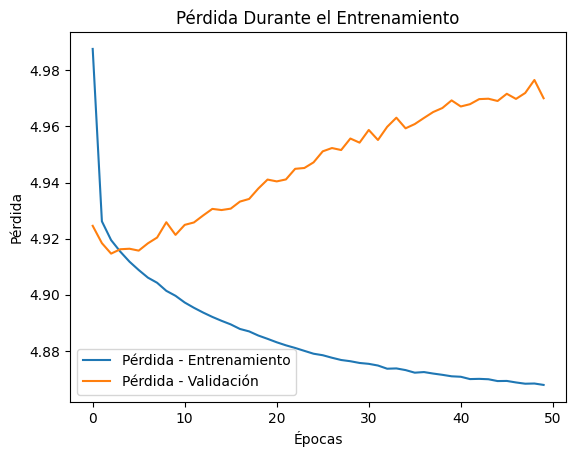

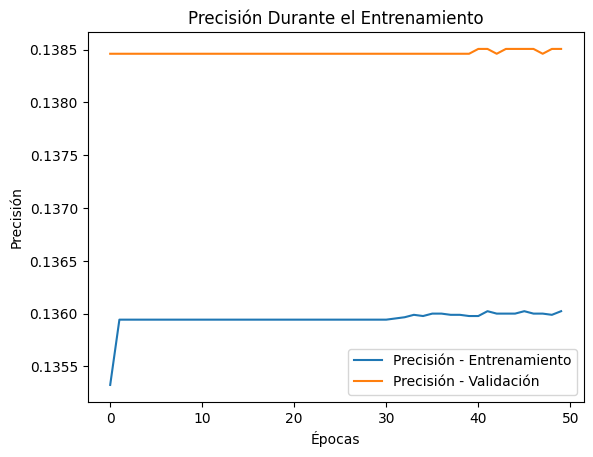

In [33]:
import matplotlib.pyplot as plt

# Gráfico de la pérdida (loss) durante el entrenamiento y validación
plt.plot(history_clf.history['loss'], label='Pérdida - Entrenamiento')
plt.plot(history_clf.history['val_loss'], label='Pérdida - Validación')
plt.title('Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfico de la precisión (accuracy) durante el entrenamiento y validación
plt.plot(history_clf.history['accuracy'], label='Precisión - Entrenamiento')
plt.plot(history_clf.history['val_accuracy'], label='Precisión - Validación')
plt.title('Precisión Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()
